# Introduction to LangGraph

## Can I re-run a *Graph Node* multiple times just like a *loop* behavior?
Having clarified, the conditional edges concept in the *langGraph* the next question which comes to my mind is, "Can we replicate *loop* behavior within *graph nodes*?". 

What I found was, I can use the same *conditional edge* concept to implement the *loop* behavior within the *graph nodes*. 

Let me define two small scenarios.
+ iterating a *graph node* on a selected number of *iterations* (i.e. either 3 times, 5 times etc.)
+ iterating a *graph node* on a random number of *iterations* (i.e it could any number of iterations)

Let me try to build these now. 

Let me start with the #1 scenario. I am going to use a `counter` and use that to *loop* through the same *node* few times. 
I am going to start with the #1 way. Let me first define the steps. 
+ import the modules
+ Define the *Graph State* variable
+ Define the *node functions*. 
    + `greeting_node`: node which greets the user
    + `loop_node`: node which does *loops* multiple times
+ Define the conditional edge function
+ setup the entry point and finish points. 
+ Visualize the graph
+ Define an input
+ invoke the graph. 



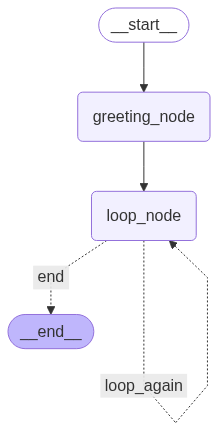

In [2]:
# Code for #1
from langgraph.graph import StateGraph, START, END 
from typing import Dict, List, TypedDict
from IPython.display import Image, display

# Define the State Variable. 
class AgentState(TypedDict):
    name: str
    counter: int 

# Define greeting_node 
def greeting_node(state: AgentState) -> AgentState:
    """Greet the user and ask for the state variable values"""
    print("Hello! What is your name?")
    state['name'] = input("Name: ")
    print(f"Nice to meet you, {state['name']}!")
    
    print("How many times would you like to repeat the greeting?")
    state['counter'] = int(input("Counter: "))
    
    return state

# Define the loop node
def loop_node(state: AgentState) -> AgentState:
    """Repeat the greeting based on the counter value"""
    if state['counter'] > 0:
        print(f"Hello again, {state['name']}!, current count: {state['counter']}")
        state['counter'] -= 1
    return state 

# Define the conditional edge
def conditional_edge(state: AgentState) -> str:
    """Check if the counter is greater than 0"""
    if state['counter'] > 0:
        return "loop_again"
    else:
        return "end"        
    
# Define the state graph
graph = StateGraph(AgentState)
graph.add_node("greeting_node", greeting_node)
graph.add_node("loop_node", loop_node)
graph.add_edge(START, "greeting_node")
graph.add_edge("greeting_node", "loop_node")

graph.add_conditional_edges(
    "loop_node",
    conditional_edge,
    {
        "loop_again": "loop_node",
        "end": END
    }
)
app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [4]:
initial_state: AgentState = {
    "name": None,
    "counter": None
}

app.invoke(initial_state)

Hello! What is your name?
Nice to meet you, anjelo!
How many times would you like to repeat the greeting?
Hello again, anjelo!, current count: 5
Hello again, anjelo!, current count: 4
Hello again, anjelo!, current count: 3
Hello again, anjelo!, current count: 2
Hello again, anjelo!, current count: 1


{'name': 'anjelo', 'counter': 0}

Now let me try the second scenario. The steps with be the same. But this time, I am going to use a *random number* to decide to finish the loop. 

In [7]:
import random

number = random.randint(1, 5)
print(f"Random number generated: {number}")

Random number generated: 5


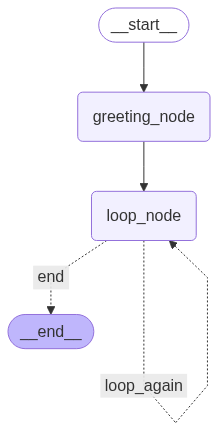

In [12]:
# Code for #1
from langgraph.graph import StateGraph, START, END 
from typing import Dict, List, TypedDict
from IPython.display import Image, display
import random 

# Define the State Variable. 
class AgentState(TypedDict):
    name: str
    your_guess: int 
    computer_guess: int

# Define greeting_node 
def greeting_node(state: AgentState) -> AgentState:
    """Greet the user and ask for the state variable values"""
    print('Inside Greeting Node')
    print(f'Current State:\n{state}')
    print("Hello! What is your name?")
    state['name'] = input("Name: ")
    print(f"Nice to meet you, {state['name']}!")
    
    print("Can you enter a number between 1 to 10 for me to guess?")
    state['your_guess'] = int(input("My Guess: "))
    
    print(f'Changed State:\n{state}')
    return state

# Define the loop node
def loop_node(state: AgentState) -> AgentState:
    """Repeat the greeting based on the counter value"""
    print(f'Inside Loop Node')
    print(f'Current State:\n{state}')
    state['computer_guess'] = random.randint(1, 10)
    print(f"The number which you guessed {state['computer_guess']}??") 
    
    print(f'Changed State:\n{state}')
    return state 

# Define the conditional edge
def conditional_edge(state: AgentState) -> str:
    """Check if the counter is greater than 0"""
    if state['your_guess'] == state['computer_guess']:
        return "end"
    else:
        return "loop_again"        
    
# Define the state graph
graph = StateGraph(AgentState)
graph.add_node("greeting_node", greeting_node)
graph.add_node("loop_node", loop_node)
graph.add_edge(START, "greeting_node")
graph.add_edge("greeting_node", "loop_node")

graph.add_conditional_edges(
    "loop_node",
    conditional_edge,
    {
        "loop_again": "loop_node",
        "end": END
    }
)
app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
app.invoke({})

Inside Greeting Node
Current State:
{}
Hello! What is your name?
Nice to meet you, eranga!
Can you enter a number between 1 to 10 for me to guess?
Changed State:
{'name': 'eranga', 'your_guess': 3}
Inside Loop Node
Current State:
{'name': 'eranga', 'your_guess': 3}
The number which you guessed 9??
Changed State:
{'name': 'eranga', 'your_guess': 3, 'computer_guess': 9}
Inside Loop Node
Current State:
{'name': 'eranga', 'your_guess': 3, 'computer_guess': 9}
The number which you guessed 7??
Changed State:
{'name': 'eranga', 'your_guess': 3, 'computer_guess': 7}
Inside Loop Node
Current State:
{'name': 'eranga', 'your_guess': 3, 'computer_guess': 7}
The number which you guessed 5??
Changed State:
{'name': 'eranga', 'your_guess': 3, 'computer_guess': 5}
Inside Loop Node
Current State:
{'name': 'eranga', 'your_guess': 3, 'computer_guess': 5}
The number which you guessed 3??
Changed State:
{'name': 'eranga', 'your_guess': 3, 'computer_guess': 3}


{'name': 'eranga', 'your_guess': 3, 'computer_guess': 3}